In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical 
from keras_preprocessing.image import load_img
from tensorflow.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

print(tf.__version__)
print(tf.config.list_physical_devices())
# depressed: 1915, happy : 1990
# Train: 70% - depressed(1340), other(1340)
# Test:  30% - depressed(575), other(575)

2.10.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
TRAIN_DIR = "D:/Depression/images/train/"
TEST_DIR = "D:/Depression/images/test/"

In [4]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory): # label
        for image_name in os.listdir(directory+label): 
            image_path = os.path.join(directory, label, image_name)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [5]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

depressed Completed
happy Completed


,image,label
0,D:/Depression/images/train/depressed\image0023...,depressed
1,D:/Depression/images/train/happy\ffhq_4489.png,happy
2,D:/Depression/images/train/happy\ffhq_4287.png,happy
3,D:/Depression/images/train/depressed\image0026...,depressed
4,D:/Depression/images/train/depressed\image0012...,depressed


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

depressed Completed
happy Completed


,image,label
0,D:/Depression/images/test/depressed\image00003...,depressed
1,D:/Depression/images/test/depressed\image00004...,depressed
2,D:/Depression/images/test/depressed\image00007...,depressed
3,D:/Depression/images/test/depressed\image00007...,depressed
4,D:/Depression/images/test/depressed\image00008...,depressed


<Axes: xlabel='label', ylabel='count'>

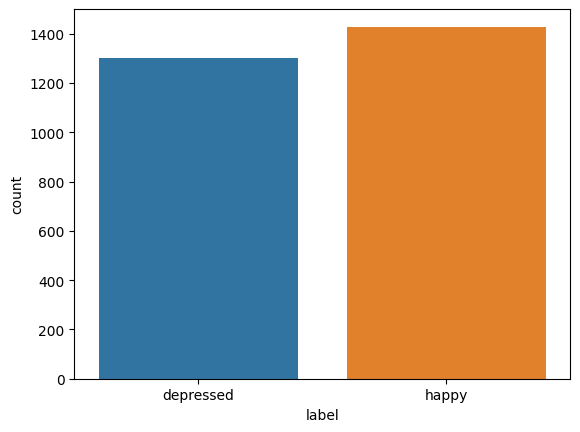

In [7]:
sns.countplot(x=train['label'])

<Axes: xlabel='label', ylabel='count'>

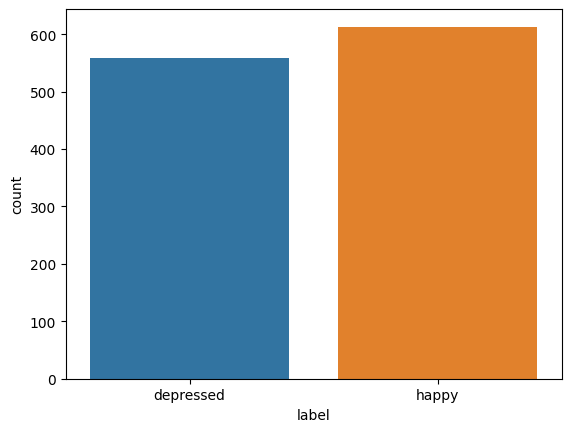

In [8]:
sns.countplot(x=test['label'])

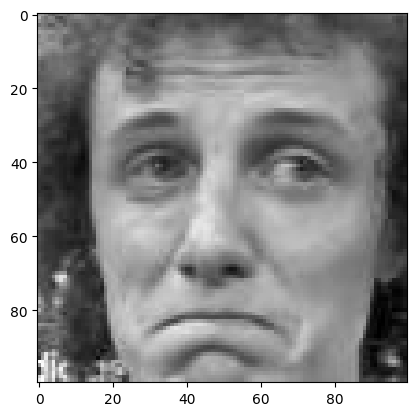

In [9]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img,cmap='gray');

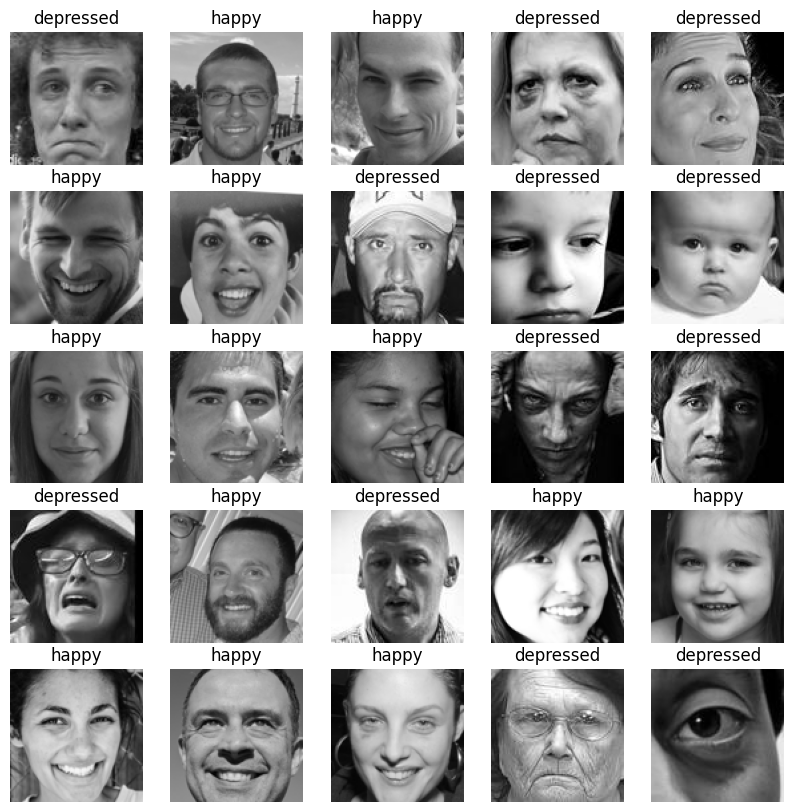

In [10]:
# to display grid of images
plt.figure(figsize=(10,10))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

Feature Extraction

In [11]:
# from PIL import Image
# resize images
# def resize_images(images):
    # for image in tqdm(images):
        # img = Image.open(image)
        # img = img.resize((48,48))
        # img.save(image)

# resize_images(train['image'])
# resize_images(test['image'])

In [12]:
# loads and preprocesses
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 100, 100,1)
    return features

train_features = extract_features(train['image'])
test_features = extract_features(test['image'])
#print(train_features)

100%|██████████| 1172/1172 [00:06<00:00, 182.57it/s]


In [13]:
x_train = train_features/255.0
x_test = test_features/255.0
print(x_train)

[[[[0.5372549 ]
   [0.52156863]
   [0.45490196]
   ...
   [0.30196078]
   [0.29019608]
   [0.3254902 ]]

  [[0.6       ]
   [0.44313725]
   [0.38431373]
   ...
   [0.24313725]
   [0.23137255]
   [0.27058824]]

  [[0.50588235]
   [0.43137255]
   [0.39607843]
   ...
   [0.22352941]
   [0.21568627]
   [0.25490196]]

  ...

  [[0.21960784]
   [0.6       ]
   [0.70196078]
   ...
   [0.14901961]
   [0.14117647]
   [0.11372549]]

  [[0.68627451]
   [0.83921569]
   [0.7254902 ]
   ...
   [0.21568627]
   [0.16862745]
   [0.16078431]]

  [[0.79607843]
   [0.85882353]
   [0.66666667]
   ...
   [0.30980392]
   [0.21568627]
   [0.21568627]]]


 [[[0.68627451]
   [0.69411765]
   [0.69411765]
   ...
   [0.62745098]
   [0.62745098]
   [0.62745098]]

  [[0.69019608]
   [0.69019608]
   [0.69019608]
   ...
   [0.62745098]
   [0.62745098]
   [0.62745098]]

  [[0.71372549]
   [0.70196078]
   [0.69803922]
   ...
   [0.62745098]
   [0.62745098]
   [0.63137255]]

  ...

  [[0.22745098]
   [0.15686275]
   [0.1

In [14]:
#import pickle

#filehandler = open("train_features.pickle","wb")
#pickle.dump(train_features,filehandler)

#filehandler = open("test_features.pickle","wb")
#pickle.dump(train_features,filehandler)

#filehandler.close()

In [15]:
# read data
#import pickle

#file = open("train_features.pickle",'rb')
#train_features_read = pickle.load(file)

#file = open("test_features.pickle",'rb')
#test_features_read = pickle.load(file)

#file.close()
#print(train_features_read)

In [16]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [18]:
y_train[0]

array([1., 0.], dtype=float32)

In [19]:
# config
input_shape = (200, 200, 1)
output_class = 2

In [20]:
from tensorflow.keras.optimizers import Adam
#  Creates a Convolutional Neural Network (CNN) using the Keras API in TensorFlow.
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')


In [21]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    mode='min',
    restore_best_weights=True
)

In [22]:
# train the model
# batch_size: 32, 64, or 128
# 81, 131 epochs
# 
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=200, validation_data=(x_test, y_test),callbacks=[early_stopping])
# history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=200, validation_data=(x_test, y_test))

Epoch 1/200
86/86 [==============================] - 23s 55ms/step - loss: 0.7283 - accuracy: 0.5348 - val_loss: 0.6921 - val_accuracy: 0.5230
Epoch 2/200
86/86 [==============================] - 4s 41ms/step - loss: 0.6929 - accuracy: 0.5231 - val_loss: 0.6921 - val_accuracy: 0.5230
Epoch 3/200
86/86 [==============================] - 3s 41ms/step - loss: 0.6923 - accuracy: 0.5231 - val_loss: 0.6921 - val_accuracy: 0.5230
Epoch 4/200
86/86 [==============================] - 4s 41ms/step - loss: 0.6924 - accuracy: 0.5231 - val_loss: 0.6923 - val_accuracy: 0.5230
Epoch 5/200
86/86 [==============================] - 4s 41ms/step - loss: 0.6928 - accuracy: 0.5231 - val_loss: 0.6922 - val_accuracy: 0.5230
Epoch 6/200
86/86 [==============================] - 4s 41ms/step - loss: 0.6924 - accuracy: 0.5223 - val_loss: 0.6921 - val_accuracy: 0.5230
Epoch 7/200
86/86 [==============================] - 4s 41ms/step - loss: 0.6926 - accuracy: 0.5227 - val_loss: 0.6921 - val_accuracy: 0.5230
Epoch

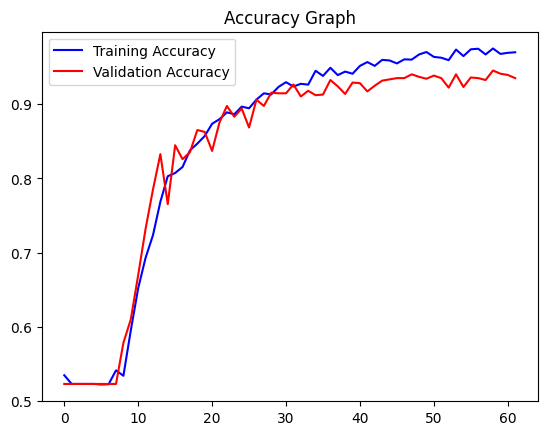

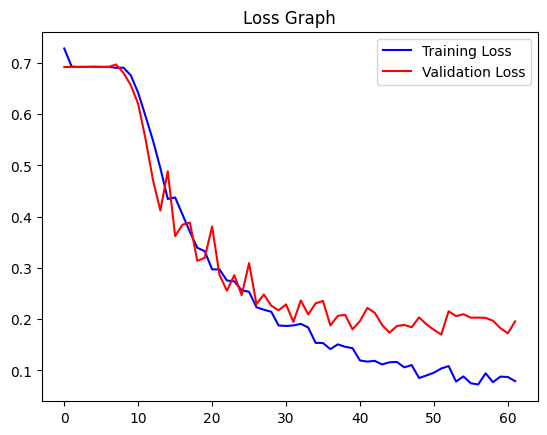

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()


In [26]:
count=0
correct=0

Original Output: happy
1/1 [==============================] - 0s 12ms/step
Predicted Output: happy
Accuracy: 0.9333333333333333


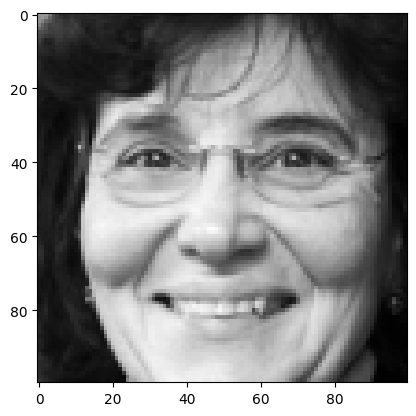

In [41]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 100, 100, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(100, 100), cmap='gray');

if test['label'][image_index]==prediction_label:
    correct += 1

count +=1
print(f'Accuracy: {correct/count}')



In [42]:
import keras
model.save("affectnet_100_2classes_model.tf")



INFO:tensorflow:Assets written to: affectnet_100_2classes_model.tf\assets


INFO:tensorflow:Assets written to: affectnet_100_2classes_model.tf\assets
